In [1]:
import pandas as pd 
import numpy as np 
#import the warnings.
import warnings 
warnings.filterwarnings("ignore")

In [2]:
!pip install xlrd
df_addr=pd.read_excel('/Users/merrillsequeira/Google Drive/INEURON_FILES/amazon_sales_proj/DATA/CUSTOMERADDRESS.xls')
df_cust_details=pd.read_excel('/Users/merrillsequeira/Google Drive/INEURON_FILES/amazon_sales_proj/DATA/CUSTOMERS.xls')
df_division=pd.read_excel('/Users/merrillsequeira/Google Drive/INEURON_FILES/amazon_sales_proj/DATA/DIVISION.xls')
df_region=pd.read_excel('/Users/merrillsequeira/Google Drive/INEURON_FILES/amazon_sales_proj/DATA/REGION.xls')
df_sales=pd.read_excel('/Users/merrillsequeira/Google Drive/INEURON_FILES/amazon_sales_proj/DATA/SALESDATA.xls')

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
df_addr.head(2)

,Address Number,City,Country,Customer Address 1,Customer Address 2,Customer Address 3,Customer Address 4,State,Zip Code
0,10000000,Akron,US,PO Box 6258,,,,OH,44312
1,10000453,,UK,,,,,NaN,


In [4]:
df_cust_details.head(2) 
#len(df_cust_details) 684
#connects to df_addr via 'Address Number'

,Address Number,Business Family,Business Unit,Customer,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type
0,10000000,R3,1,City Supermarket,10000000,G2,2,,816-455-8733,4,S16,C
1,10000453,R3,1,A Supermarket,10000453,G1,1,,816-455-8733,5,S19,C


In [5]:
df_division.head(2)

,Division,Division Name
0,1,International
1,2,Domestic


In [6]:
df_region.head(2)
#connects to df_cust_details via 'Region Code'

,Region Code,Region Name
0,0,Canada
1,1,Western


In [7]:
df_sales.head(2)

#connects to df_cust_details via 'CustKey' to 'Customer Number'

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.91,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.17,1,127,EA,NaN,NaN


In [8]:
df_sales.columns, len(df_sales) 

(Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
        'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
        'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
        'Sales Amount Based on List Price', 'Sales Cost Amount',
        'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
        'U/M', 'Unnamed: 20', 'Unnamed: 21'],
       dtype='object'),
 65282)

In [9]:
#connecting df_sales AND df_cust_details

df1=df_sales.merge(df_cust_details, left_on='CustKey', right_on='Customer Number')


In [10]:
df2=df1.merge(df_region, left_on='Region Code', right_on='Region Code')

In [11]:
df2.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Unnamed: 20', 'Unnamed: 21', 'Address Number',
       'Business Family', 'Business Unit', 'Customer', 'Customer Number',
       'Customer Type', 'Division', 'Line of Business', 'Phone', 'Region Code',
       'Regional Sales Mgr', 'Search Type', 'Region Name'],
      dtype='object')

In [12]:
df3=df2.merge(df_division, left_on='Division', right_on='Division')


In [13]:
len(df3)

65812

In [14]:
df3.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type,Region Name,Division Name
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic
1,10000481,2017-01-05,1681.20,2017-01-05,330000,P01,30283,Even Better 2% Milk,1000,1321.70,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic
2,10000481,2017-01-14,389.88,2017-01-14,120000,P01,33445,Best Choice Corn Chips,1000,974.69,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic
3,10000481,2017-01-17,389.88,2017-01-17,120327,P01,33445,Best Choice Corn Chips,1000,974.69,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic
4,10000481,2019-02-12,1681.20,2019-02-12,321678,P01,30283,Even Better 2% Milk,1000,1321.70,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65812 entries, 0 to 65811
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65812 non-null  int64         
 1   DateKey                           65812 non-null  datetime64[ns]
 2   Discount Amount                   65810 non-null  float64       
 3   Invoice Date                      65812 non-null  datetime64[ns]
 4   Invoice Number                    65812 non-null  int64         
 5   Item Class                        57473 non-null  object        
 6   Item Number                       65771 non-null  object        
 7   Item                              65812 non-null  object        
 8   Line Number                       65812 non-null  int64         
 9   List Price                        65812 non-null  float64       
 10  Order Number                      65812 non-nu

In [16]:
df3.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Unnamed: 20,Address Number,Business Unit,Customer Number,Division,Region Code
count,6.581200e+04,65810.000000,65812.000000,65812.000000,65812.000000,65812.000000,65812.000000,65812.000000,65812.000000,65812.000000,65811.000000,65812.000000,65812.000000,0.0,6.581200e+04,65812.0,6.581200e+04,65812.000000,65812.000000
mean,1.001774e+07,1846.884026,215527.142345,23778.377226,514.889152,180853.052741,2836.655644,4683.401463,1651.858343,1184.797301,283.711742,44.752066,137.595195,NaN,1.001774e+07,1.0,1.001774e+07,1.649243,3.081794
std,7.157084e+03,9001.812160,95021.135666,32639.759888,448.874450,67450.851659,15104.649566,20615.966433,9518.725202,5837.840329,252.638939,427.944360,26.699724,NaN,7.157084e+03,0.0,7.157084e+03,0.477211,1.677093
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN,1.000045e+07,1.0,1.000045e+07,1.000000,0.000000
25%,1.001272e+07,246.200000,117807.000000,3000.000000,181.560000,115972.750000,308.010000,561.040000,167.750000,129.930000,100.255486,2.000000,113.000000,NaN,1.001272e+07,1.0,1.001272e+07,1.000000,2.000000
50%,1.001981e+07,441.200000,222643.000000,12000.000000,325.190000,203762.000000,552.500000,997.050000,303.760000,246.330000,183.760000,3.000000,134.000000,NaN,1.001981e+07,1.0,1.001981e+07,2.000000,4.000000
75%,1.002351e+07,996.460000,314252.000000,32000.000000,803.860000,218578.000000,1275.620000,2308.080000,682.810000,576.240000,447.094167,8.000000,161.000000,NaN,1.002351e+07,1.0,1.002351e+07,2.000000,5.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN,1.002758e+07,1.0,1.002758e+07,2.000000,5.000000


In [17]:
# outliers suspected in 'Discount Amount' , 'List Price' , 'Sales Amount' , 'Sales Amount Based on List Price',
#'Sales Margin Amount', 'Sales Price' ,'Sales Quantity'  

In [18]:
#checking nulls 
df3.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8339
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65812
Unnamed: 21                         65808
Address Number                          0
Business Family                   

In [19]:
df3=df3[~df3['Item Class'].isnull()] 

In [20]:
df3=df3[~df3['Item Number'].isnull()] 

In [21]:
df3.drop(columns=['Unnamed: 20','Unnamed: 21'],axis=1,inplace=True)

In [22]:
df3.shape #originally 65812 

(57473, 34)

In [23]:
df3.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Address Number', 'Business Family', 'Business Unit', 'Customer',
       'Customer Number', 'Customer Type', 'Division', 'Line of Business',
       'Phone', 'Region Code', 'Regional Sales Mgr', 'Search Type',
       'Region Name', 'Division Name'],
      dtype='object')

In [24]:
outs=['Discount Amount' , 'List Price' , 'Sales Amount' , 'Sales Amount Based on List Price','Sales Margin Amount', 'Sales Price' ,'Sales Quantity']

In [25]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import seaborn as sns 

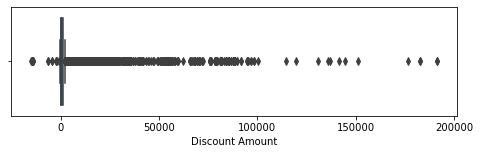

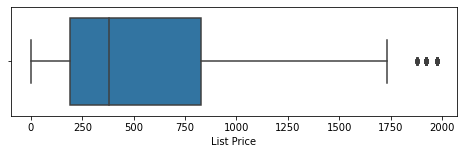

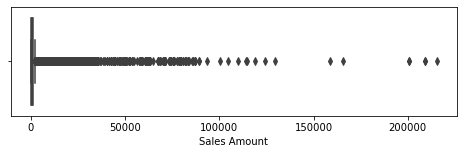

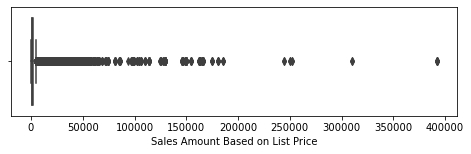

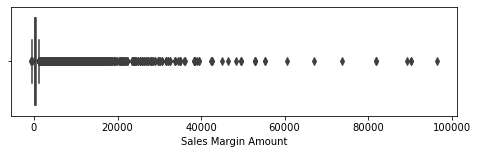

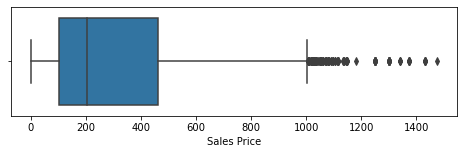

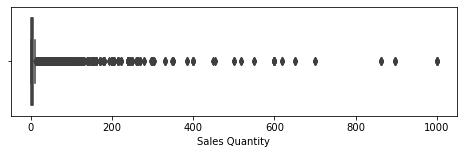

In [26]:
for i in outs:
    plt.figure(figsize=(8,2)) 
    sns.boxplot(df3[i])
    

In [27]:
# capping outliers 
percentiles = df3['Discount Amount'].quantile([0.05,0.90]).values
df3['Discount Amount'][df3['Discount Amount'] <= percentiles[0]] = percentiles[0]
df3['Discount Amount'][df3['Discount Amount'] >= percentiles[1]] = percentiles[1]

In [28]:
percentiles2 = df3['Sales Amount'].quantile([0.05,0.90]).values
df3['Sales Amount'][df3['Sales Amount'] <= percentiles2[0]] = percentiles2[0]
df3['Sales Amount'][df3['Sales Amount'] >= percentiles2[1]] = percentiles2[1]

In [29]:
#Sales Amount Based on List Price
percentiles3 = df3['Sales Amount Based on List Price'].quantile([0.05,0.90]).values
df3['Sales Amount Based on List Price'][df3['Sales Amount Based on List Price'] <= percentiles3[0]] = percentiles3[0]
df3['Sales Amount Based on List Price'][df3['Sales Amount Based on List Price'] >= percentiles3[1]] = percentiles3[1]


In [30]:
#Sales Margin Amount

percentiles4 = df3['Sales Margin Amount'].quantile([0.05,0.90]).values
df3['Sales Margin Amount'][df3['Sales Margin Amount'] <= percentiles4[0]] = percentiles4[0]
df3['Sales Margin Amount'][df3['Sales Margin Amount'] >= percentiles4[1]] = percentiles4[1]




In [31]:
#Sales Quantity
percentiles5 = df3['Sales Quantity'].quantile([0.05,0.90]).values
df3['Sales Quantity'][df3['Sales Quantity'] <= percentiles5[0]] = percentiles5[0]
df3['Sales Quantity'][df3['Sales Quantity'] >= percentiles5[1]] = percentiles5[1]



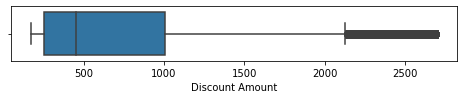

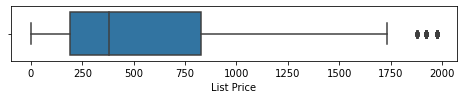

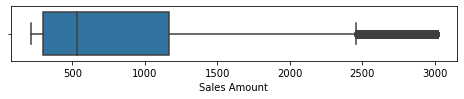

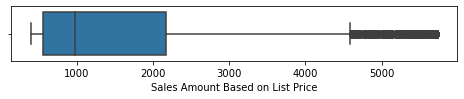

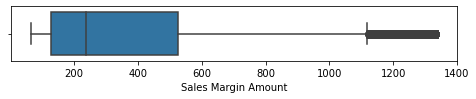

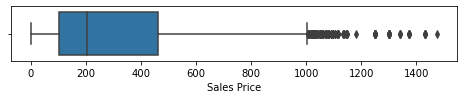

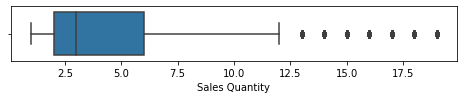

In [32]:
for i in outs:
    plt.figure(figsize=(8,1)) 
    sns.boxplot(df3[i])
    

In [33]:
# percentiles5, percentiles4, percentiles3, percentiles2, percentiles

In [34]:
df3.shape

(57473, 34)

In [35]:
df3.head(2)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Customer Number,Customer Type,Division,Line of Business,Phone,Region Code,Regional Sales Mgr,Search Type,Region Name,Division Name
1,10000481,2017-01-05,1681.20,2017-01-05,330000,P01,30283,Even Better 2% Milk,1000,1321.70,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic
2,10000481,2017-01-14,389.88,2017-01-14,120000,P01,33445,Best Choice Corn Chips,1000,974.69,...,10000481,G2,2,,816-455-8733,4,S5,C,Central,Domestic


In [36]:
df3.columns, df3.shape

(Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
        'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
        'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
        'Sales Amount Based on List Price', 'Sales Cost Amount',
        'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
        'U/M', 'Address Number', 'Business Family', 'Business Unit', 'Customer',
        'Customer Number', 'Customer Type', 'Division', 'Line of Business',
        'Phone', 'Region Code', 'Regional Sales Mgr', 'Search Type',
        'Region Name', 'Division Name'],
       dtype='object'),
 (57473, 34))

In [37]:
# keeping a subdataset for time series analysis 
df4=df3[['DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 
       'List Price', 'Order Number', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity']]


In [38]:
df4.head(3)
#find the sales trend - yearly, monthly etc 

,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity
1,2017-01-05,1681.20,2017-01-05,330000,P01,30283,Even Better 2% Milk,1321.70,124466,2283.90,3965.10,1634.19,649.71,761.30,3
2,2017-01-14,389.88,2017-01-14,120000,P01,33445,Best Choice Corn Chips,974.69,217302,584.81,974.69,353.52,231.29,584.81,1
3,2017-01-17,389.88,2017-01-17,120327,P01,33445,Best Choice Corn Chips,974.69,217557,584.81,974.69,353.52,231.29,584.81,1


In [39]:
df4=df4.set_index('DateKey')

In [40]:
df_grp=df4.groupby(['DateKey'])['Sales Amount'].sum()

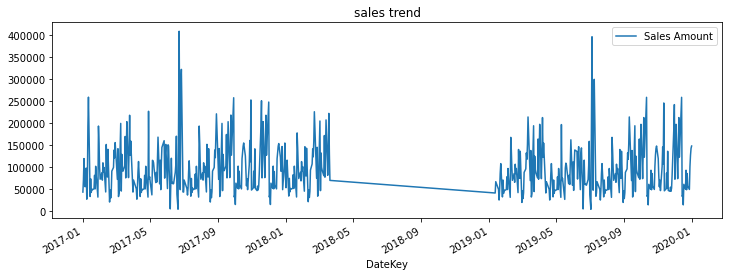

In [41]:
#plotting time series 

df_grp.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('sales trend')
plt.show(block=False)

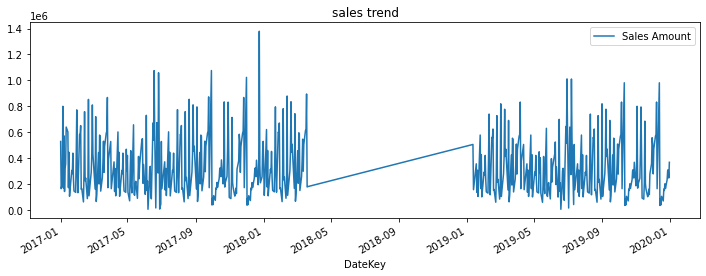

In [42]:
df_sales.groupby(['DateKey'])['Sales Amount'].sum().plot(figsize=(12, 4))

plt.legend(loc='best')
plt.title('sales trend')
plt.show(block=False)

In [43]:
sales_trend=df_sales.groupby(['DateKey'])['Sales Amount'].sum()


In [44]:
sales_trend=sales_trend.groupby(pd.Grouper(freq='M')).sum()

In [45]:
#dividing the sheets up by years 
# sales_trend
amz_2017=sales_trend['2017-01-31':'2017-12-31']
amz_2019=sales_trend['2019-01-31':'2019-12-31']
amz_2018=sales_trend['2018-01-31':'2018-12-31']

amz_2017.to_excel('amz2017.xlsx')
amz_2019.to_excel('amz2019.xlsx')
amz_2018.to_excel('amz2018.xlsx')

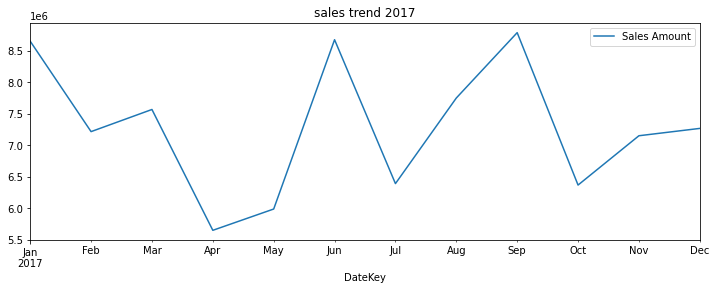

In [46]:
amz_2017.plot(figsize=(12, 4))

plt.legend(loc='best')
plt.title('sales trend 2017')
plt.show(block=False)

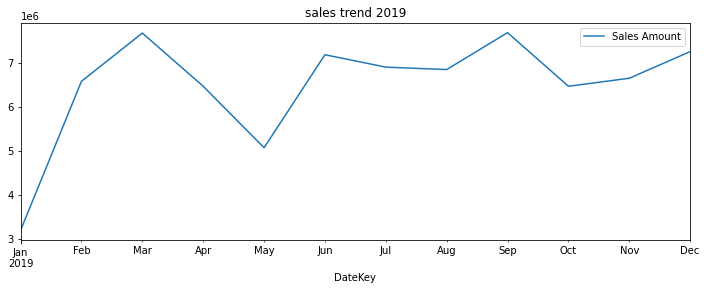

In [47]:
amz_2019.plot(figsize=(12, 4))

plt.legend(loc='best')
plt.title('sales trend 2019')
plt.show(block=False)

# time series analysis of 2017 sales data 
#### we can now proceed to perform time series analysis on these two timelines for the following objectives 

- find the yearly sales trend 
- find the monthly sales trend 
- find the quarterly sales trend 

In [48]:
data=amz_2017
data=pd.DataFrame(data)


In [49]:
data.rename({'Sales Amount':'SalesAmount'},axis=1, inplace=True)



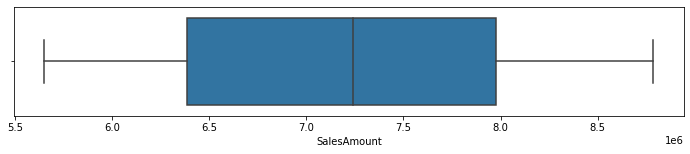

In [50]:

fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['SalesAmount'],whis=1.5)

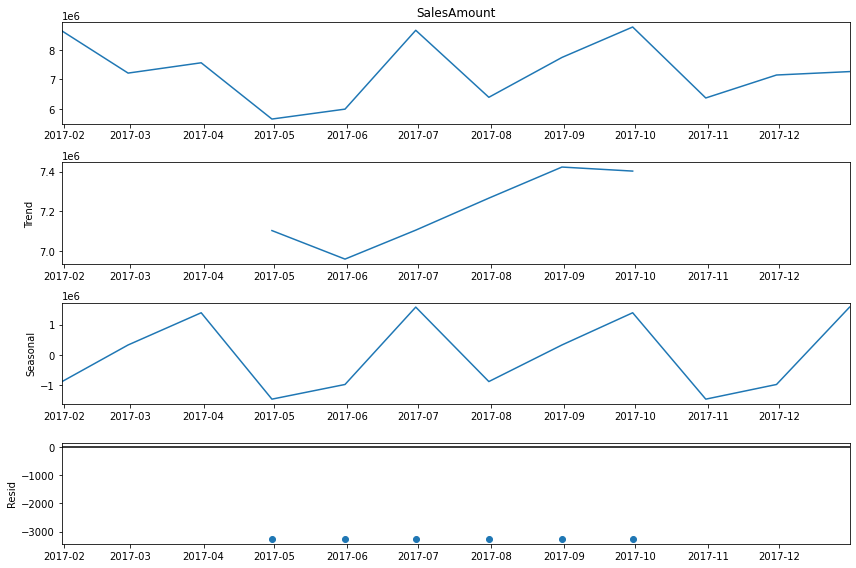

In [51]:
#seasonal decomposition - removing the seasonality from the time series 

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.SalesAmount, model='additive',period=6) # additive seasonal index
fig = decomposition.plot()
plt.show()

### building a forecasting model 

In [52]:
print('using 20% of data as test - rest as train- making train set as {} rows '.format( len(data)*0.8  )) 

using 20% of data as test - rest as train- making train set as 9.600000000000001 rows 


In [53]:
train_len = 10
train = data[0:train_len] # first 9 rows as training set
test = data[train_len-1:] # last 3 months as out-of-time test set

In [54]:
#naive forcast 
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['SalesAmount'][train_len-1]

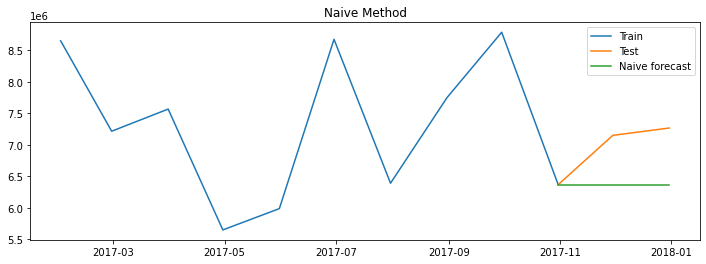

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['SalesAmount'], label='Train')
plt.plot(test['SalesAmount'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [56]:
#calculating RMSE and MAPE 

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['SalesAmount'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SalesAmount']-y_hat_naive['naive_forecast'])/test['SalesAmount'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,687725.29,7.77


In [57]:
#naive method is producing sub par results - due to higher outliers - this can be viewed in the RMSE 
#taking the baseline case 
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['SalesAmount'].mean()


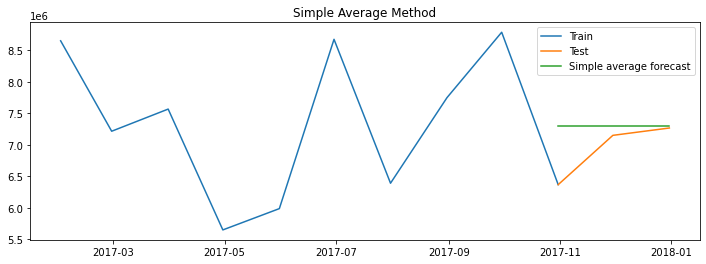

In [58]:
#taking the simple average method 

plt.figure(figsize=(12,4))
plt.plot(train['SalesAmount'], label='Train')
plt.plot(test['SalesAmount'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()


In [59]:
rmse = np.sqrt(mean_squared_error(test['SalesAmount'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SalesAmount']-y_hat_avg['avg_forecast'])/test['SalesAmount'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,687725.29,7.77
0,Simple average method,547779.58,5.78


In [60]:
# results from the simple average method - is the same or worse than the naive method 
#using the SIMPLE MOVING AVERAGE METHOD 

y_hat_sma = data.copy()
ma_window = 48
y_hat_sma['sma_forecast'] = data['SalesAmount'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

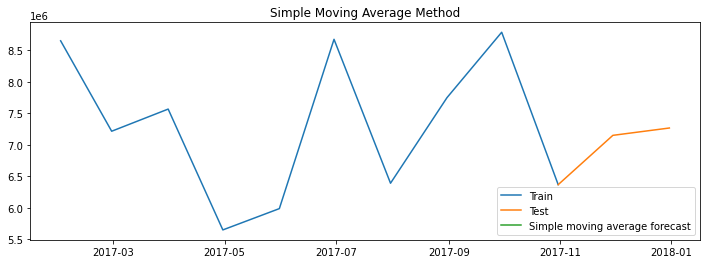

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['SalesAmount'], label='Train')
plt.plot(test['SalesAmount'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV


In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['SalesAmount']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.44, smoothing_slope=1, optimized=False)  #smoothing_level aka alpha smoothing_slope aka beta 
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.44, 'smoothing_trend': 1.0, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 7428660.871999996, 'initial_trend': -22585.888181817834, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['SalesAmount']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.40, smoothing_slope=0.32, optimized=False)  #smoothing_level aka alpha smoothing_slope aka beta 
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.4, 'smoothing_trend': 0.32, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 7428660.871999996, 'initial_trend': -22585.888181817834, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


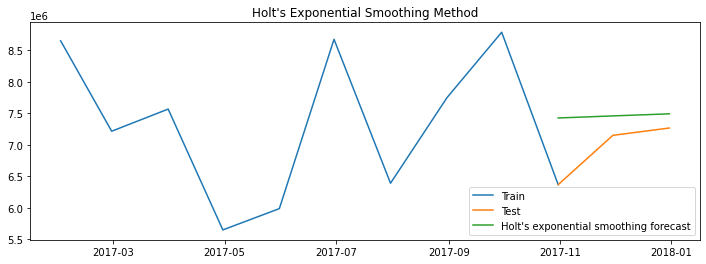

In [65]:
plt.figure(figsize=(12,4))
plt.plot( train['SalesAmount'], label='Train')
plt.plot(test['SalesAmount'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [66]:
rmse = np.sqrt(mean_squared_error(test['SalesAmount'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SalesAmount']-y_hat_holt['holt_forecast'])/test['SalesAmount'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,687725.29,7.77
0,Simple average method,547779.58,5.78
0,Holt's exponential smoothing method,649097.17,8.00


In [67]:
# holts methd produced slightly better results 
# moving to holts/winters method 

y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['SalesAmount']) ,seasonal_periods=2 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.3585714285714286, 'smoothing_trend': 0.3585714285714286, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 7933389.0649999995, 'initial_trend': -662095.22, 'initial_seasons': array([1.09038526, 0.90961474]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [68]:
print('base line sales projection is {} while minimum projection is {} and max is {} '.format(round(y_hat_hwa['hw_forecast'].mean()),round(y_hat_hwa['hw_forecast'].min()) , round(y_hat_hwa['hw_forecast'].max())))

base line sales projection is 8137658 while minimum projection is 7186285 and max is 8796625 


#### basis the earlier trends - the simple average model yields the best results - we can use that to forecast the 2019 model as well 

In [69]:
data2=amz_2019
data2=pd.DataFrame(data2)


In [70]:
data2.rename({'Sales Amount':'SalesAmount'},axis=1, inplace=True)

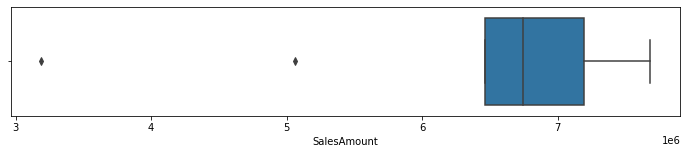

In [71]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data2['SalesAmount'],whis=1.5)

In [72]:
percentiles = data2['SalesAmount'].quantile([0.15,0.90]).values
data2['SalesAmount'][data2['SalesAmount'] <= percentiles[0]] = percentiles[0]
data2['SalesAmount'][data2['SalesAmount'] >= percentiles[1]] = percentiles[1]



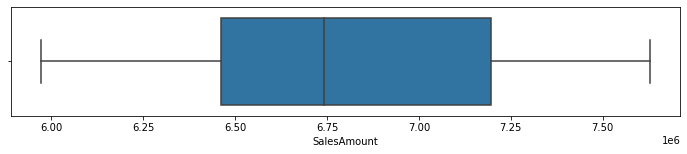

In [73]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data2['SalesAmount'],whis=1.5)


In [74]:
train_len = 10
train = data2[0:train_len] # first 9 rows as training set
test = data2[train_len-1:] # last 3 months as out-of-time test set

In [75]:
#using simple average method 

y_hat_sma = data2.copy()
ma_window = 24
y_hat_sma['sma_forecast'] = data2['SalesAmount'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]



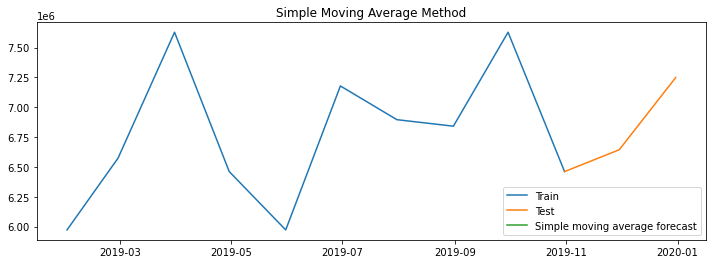

In [76]:
plt.figure(figsize=(12,4))
plt.plot(train['SalesAmount'], label='Train')
plt.plot(test['SalesAmount'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(test['SalesAmount'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['SalesAmount']-y_hat_avg['avg_forecast'])/test['SalesAmount'])*100,2)

In [78]:
print(rmse,mape)

619338.98 nan


In [79]:
#### working on weekly forecasts 

sales_trend_wk=sales_trend.groupby(pd.Grouper(freq='Q')).sum()


In [80]:
q1_2017_q1_2018=sales_trend_wk['2017-03-31':'2018-06-30']
q2_2018_q4_2018=sales_trend_wk['2018-06-30':'2019-03-31']
q1_2019_q4_2019=sales_trend_wk['2019-03-31':'2019-12-31']

In [84]:
sales_trend.groupby(pd.Grouper(freq='Y')).sum()

DateKey
2017-12-31    87462706.40
2018-12-31    20817471.00
2019-12-31    77906591.65
Freq: A-DEC, Name: Sales Amount, dtype: float64